In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
from pywaffle import Waffle
import math
from sklearn.metrics.pairwise import euclidean_distances
from scipy.stats import norm
import statistics
from matplotlib.cbook import boxplot_stats

In [2]:
# Rodar uma destas linhas caso você não tenha alguma destas bibliotecas acima
# !pip install pywaffle
# !pip install pandas
# !pip install numpy
# !pip install sklearn
# !pip install scipy

In [3]:
base = pd.read_csv('Base mesclada filtrada.csv')

In [4]:
base_original = base.copy()
base.drop(labels=['Ano da Venda','Ano da Construção','Unnamed: 0'], axis=1, inplace=True)

In [5]:
base.head()

,Preço da venda,Zona,Qualidade do Aquecimento,Número de Quartos,Área da Garagem,Área do Lote,Número de Banheiros,Idade do Imóvel
0,208500.0,Baixa Densidade Residencial,Excelente,3,548.0,8450,2,5
1,181500.0,Baixa Densidade Residencial,Excelente,3,460.0,9600,2,31
2,223500.0,Baixa Densidade Residencial,Excelente,3,608.0,11250,2,7
3,140000.0,Baixa Densidade Residencial,Bom,3,642.0,9550,1,91
4,250000.0,Baixa Densidade Residencial,Excelente,4,836.0,14260,2,8


In [6]:
base.shape

(2919, 8)

In [7]:
base.corr()

,Preço da venda,Número de Quartos,Área da Garagem,Área do Lote,Número de Banheiros,Idade do Imóvel
Preço da venda,1.000000,0.229611,0.464809,0.296497,0.433710,-0.363226
Número de Quartos,0.229611,1.000000,0.073912,0.132801,0.356125,0.052136
Área da Garagem,0.464809,0.073912,1.000000,0.213251,0.408487,-0.480602
Área do Lote,0.296497,0.132801,0.213251,1.000000,0.125826,-0.025143
Número de Banheiros,0.433710,0.356125,0.408487,0.125826,1.000000,-0.470686
Idade do Imóvel,-0.363226,0.052136,-0.480602,-0.025143,-0.470686,1.000000


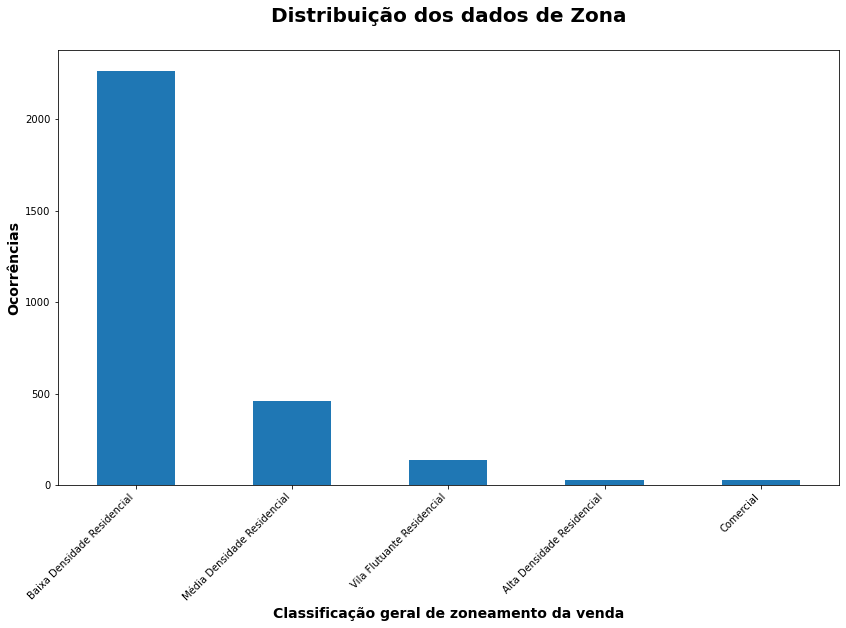

In [8]:
base['Zona'].value_counts().to_frame().plot(kind='bar', legend=None, figsize=(14,8))
plt.title('Distribuição dos dados de Zona\n', fontdict = {'fontsize':20, 'fontweight':'bold'})
plt.ylabel('Ocorrências', fontdict = {'fontsize':14,'fontweight':'bold'})
plt.xlabel('Classificação geral de zoneamento da venda',  fontdict = {'fontsize':14,'fontweight':'bold'})
plt.xticks(rotation=45, horizontalalignment='right')
plt.show()

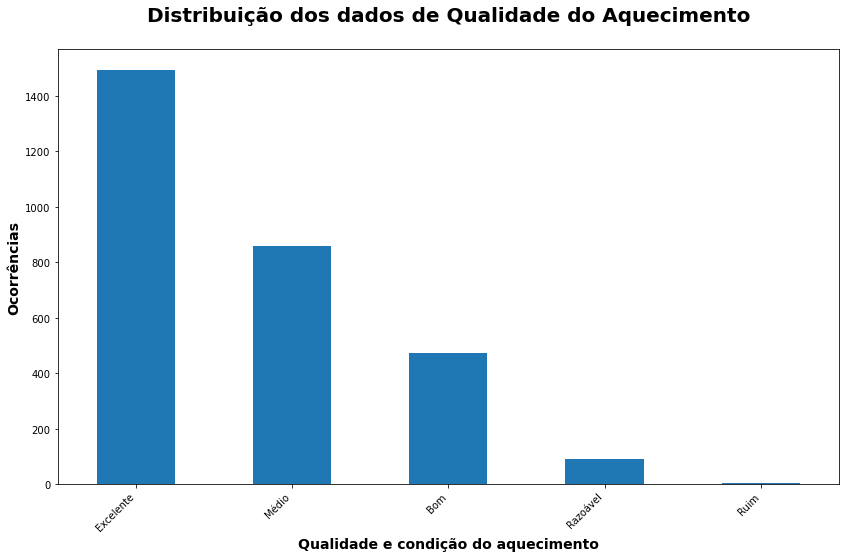

In [9]:
base['Qualidade do Aquecimento'].value_counts().to_frame().plot(kind='bar', legend=None, figsize=(14,8))
plt.title('Distribuição dos dados de Qualidade do Aquecimento\n', fontdict = {'fontsize':20, 'fontweight':'bold'})
plt.ylabel('Ocorrências',{'fontsize':14,'fontweight':'bold'})
plt.xlabel('Qualidade e condição do aquecimento',{'fontsize':14,'fontweight':'bold'})
plt.xticks(rotation=45, horizontalalignment='right')
plt.show()

In [10]:
valores_grafico = (base['Zona'].value_counts()/base['Zona'].shape[0]*100).apply(lambda x: math.ceil(x)).to_dict()

In [11]:
valores_grafico

{'Baixa Densidade Residencial': 78,
 'Média Densidade Residencial': 16,
 'Vila Flutuante Residencial': 5,
 'Alta Densidade Residencial': 1,
 'Comercial': 1}

In [12]:
# compensar para o gráfico ficar mais bonito
valores_grafico['Comercial']=valores_grafico['Comercial']-1

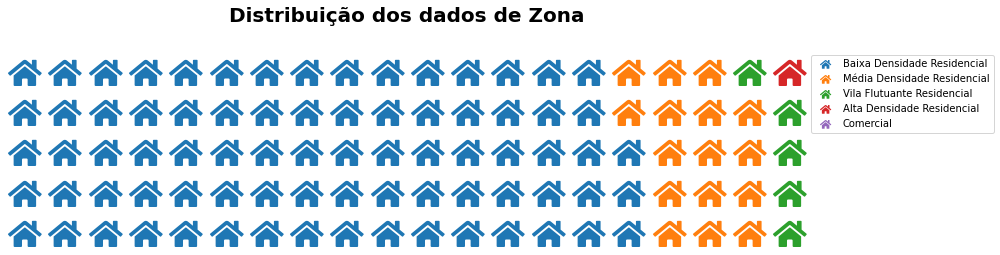

In [13]:
fig = plt.figure(
    FigureClass=Waffle, 
    rows=5, 
    values=valores_grafico, 
    cmap_name="tab10",
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)},
    icons='home', 
    font_size=30, 
    icon_legend=True,
    figsize=(14, 8)
)
plt.title('Distribuição dos dados de Zona\n', fontdict = {'fontsize':20, 'fontweight':'bold'})
plt.show()

In [14]:
valores_grafico2 = (base['Qualidade do Aquecimento'].value_counts()/base['Qualidade do Aquecimento'].shape[0]*100).apply(lambda x: math.ceil(x)).to_dict()

In [15]:
valores_grafico2

{'Excelente': 52, 'Médio': 30, 'Bom': 17, 'Razoável': 4, 'Ruim': 1}

In [16]:
# compensar para o gráfico ficar maos bonito
valores_grafico2['Excelente']=valores_grafico2['Excelente']+1

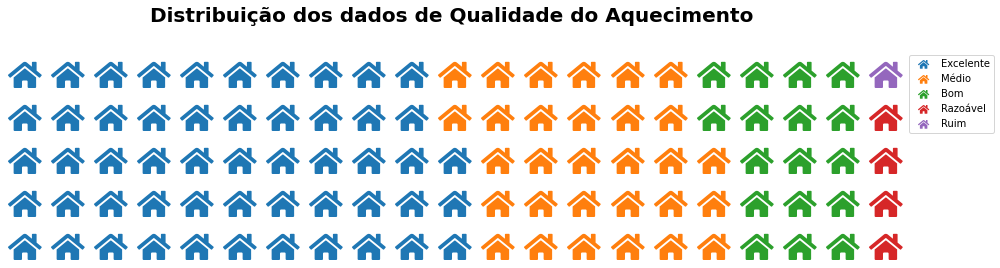

In [17]:
fig = plt.figure(
    FigureClass=Waffle, 
    rows=5, 
    values=valores_grafico2, 
    cmap_name="tab10",
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)},
    icons='home', 
    font_size=30, 
    icon_legend=True,
    figsize=(14, 8)
)
plt.title('Distribuição dos dados de Qualidade do Aquecimento \n', fontdict = {'fontsize':20, 'fontweight':'bold'})
plt.show()

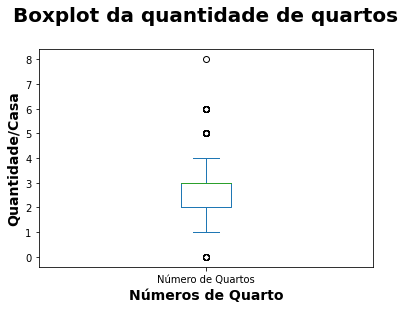

In [18]:
base[['Número de Quartos']].plot(kind='box')
plt.title('Boxplot da quantidade de quartos\n', fontdict = {'fontsize':20, 'fontweight':'bold'})
plt.ylabel('Quantidade/Casa',fontdict = {'fontsize':14,'fontweight':'bold'})
plt.xlabel('Números de Quarto', fontdict = {'fontsize':14,'fontweight':'bold'})
plt.show()

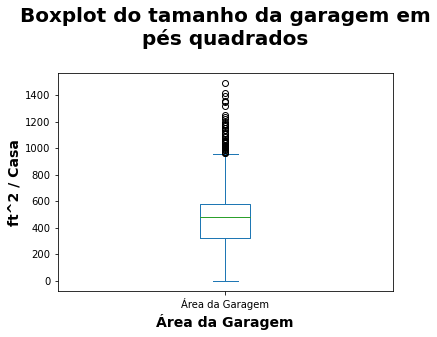

In [19]:
base[['Área da Garagem']].plot(kind='box')
plt.title('Boxplot do tamanho da garagem em\npés quadrados\n', fontdict = {'fontsize':20, 'fontweight':'bold'})
plt.ylabel('ft^2 / Casa',fontdict = {'fontsize':14,'fontweight':'bold'})
plt.xlabel('Área da Garagem',fontdict = {'fontsize':14,'fontweight':'bold'})
plt.show()

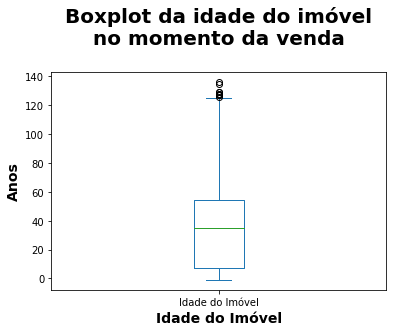

In [20]:
base[['Idade do Imóvel']].plot(kind='box')
plt.title('Boxplot da idade do imóvel\nno momento da venda\n', fontdict = {'fontsize':20, 'fontweight':'bold'})
plt.ylabel('Anos',fontdict = {'fontsize':14,'fontweight':'bold'})
plt.xlabel('Idade do Imóvel',fontdict = {'fontsize':14,'fontweight':'bold'})
plt.show()

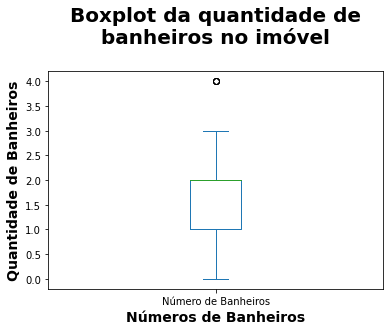

In [21]:
base[['Número de Banheiros']].plot(kind='box')
plt.title('Boxplot da quantidade de\nbanheiros no imóvel\n', fontdict = {'fontsize':20, 'fontweight':'bold'})
plt.ylabel('Quantidade de Banheiros',fontdict = {'fontsize':14,'fontweight':'bold'})
plt.xlabel('Números de Banheiros',fontdict = {'fontsize':14,'fontweight':'bold'})
plt.show()

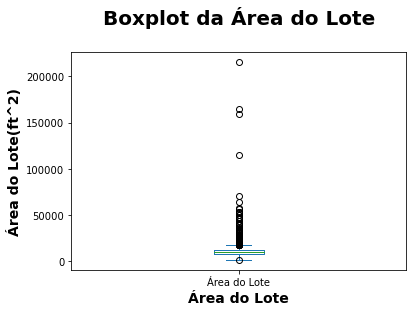

In [22]:
base[['Área do Lote']].plot(kind='box')
plt.title('Boxplot da Área do Lote\n', fontdict = {'fontsize':20, 'fontweight':'bold'})
plt.ylabel('Área do Lote(ft^2)',fontdict = {'fontsize':14,'fontweight':'bold'})
plt.xlabel('Área do Lote',fontdict = {'fontsize':14,'fontweight':'bold'})
plt.show()

In [23]:
statsBox = boxplot_stats(base[['Número de Quartos']])
statsBox

[{'mean': 2.860226104830421,
  'iqr': 1.0,
  'cilo': 2.9709408701952627,
  'cihi': 3.0290591298047373,
  'whishi': 4,
  'whislo': 1,
  'fliers': array([0, 0, 0, 0, 0, 0, 0, 0, 5, 5, 6, 5, 6, 5, 5, 6, 5, 6, 5, 8, 5, 6,
         5, 5, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 5, 5, 6, 6, 5, 5, 5, 5, 5,
         6, 6, 6, 6, 6, 6, 6, 5, 5, 5, 6, 5, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5,
         6, 5, 5, 5, 5, 5, 5, 5, 6, 6, 5, 5]),
  'q1': 2.0,
  'med': 3.0,
  'q3': 3.0}]

## Usando one-hot encoding para quantificar os dados qualitativos

In [24]:
dummy_MSZoning = pd.get_dummies(base['Zona'])
dummy_HeatingQC = pd.get_dummies(base['Qualidade do Aquecimento'])
base_dummy = base.merge(dummy_MSZoning,left_index=True,right_index=True)
base_dummy = base_dummy.merge(dummy_HeatingQC,left_index=True,right_index=True)

In [25]:
base_dummy.corr()

,Preço da venda,Número de Quartos,Área da Garagem,Área do Lote,Número de Banheiros,Idade do Imóvel,Alta Densidade Residencial,Baixa Densidade Residencial,Comercial,Média Densidade Residencial,Vila Flutuante Residencial,Bom,Excelente,Médio,Razoável,Ruim
Preço da venda,1.000000,0.229611,0.464809,0.296497,0.433710,-0.363226,-0.054856,0.210173,-0.075810,-0.230235,0.035770,-0.099081,0.305709,-0.218063,-0.093934,-0.017271
Número de Quartos,0.229611,1.000000,0.073912,0.132801,0.356125,0.052136,0.024975,0.137434,-0.042963,-0.100253,-0.087169,-0.011007,-0.011929,0.027241,-0.009871,-0.020546
Área da Garagem,0.464809,0.073912,1.000000,0.213251,0.408487,-0.480602,-0.046038,0.193937,-0.094305,-0.250265,0.113654,-0.106511,0.314084,-0.212983,-0.116688,-0.010012
Área do Lote,0.296497,0.132801,0.213251,1.000000,0.125826,-0.025143,-0.031998,0.236318,-0.021774,-0.206661,-0.102614,-0.022645,0.018455,0.000193,-0.005352,-0.000814
Número de Banheiros,0.433710,0.356125,0.408487,0.125826,1.000000,-0.470686,0.001530,0.124051,-0.082038,-0.216461,0.165990,-0.092800,0.334659,-0.266381,-0.064748,-0.013614
Idade do Imóvel,-0.363226,0.052136,-0.480602,-0.025143,-0.470686,1.000000,0.058366,-0.290233,0.155790,0.412859,-0.240404,0.160922,-0.459562,0.305349,0.173118,0.033332
Alta Densidade Residencial,-0.054856,0.024975,-0.046038,-0.031998,0.001530,0.058366,1.000000,-0.176424,-0.008811,-0.041003,-0.021198,-0.002195,-0.031354,0.042967,-0.017102,-0.003041
Baixa Densidade Residencial,0.210173,0.137434,0.193937,0.236318,0.124051,-0.290233,-0.176424,1.000000,-0.172968,-0.804905,-0.416131,-0.048568,0.056717,-0.007198,-0.030039,-0.059691
Comercial,-0.075810,-0.042963,-0.094305,-0.021774,-0.082038,0.155790,-0.008811,-0.172968,1.000000,-0.040199,-0.020783,-0.000601,-0.057915,0.038044,0.068350,-0.002981
Média Densidade Residencial,-0.230235,-0.100253,-0.250265,-0.206661,-0.216461,0.412859,-0.041003,-0.804905,-0.040199,1.000000,-0.096713,0.095103,-0.152885,0.070088,0.045755,0.044815


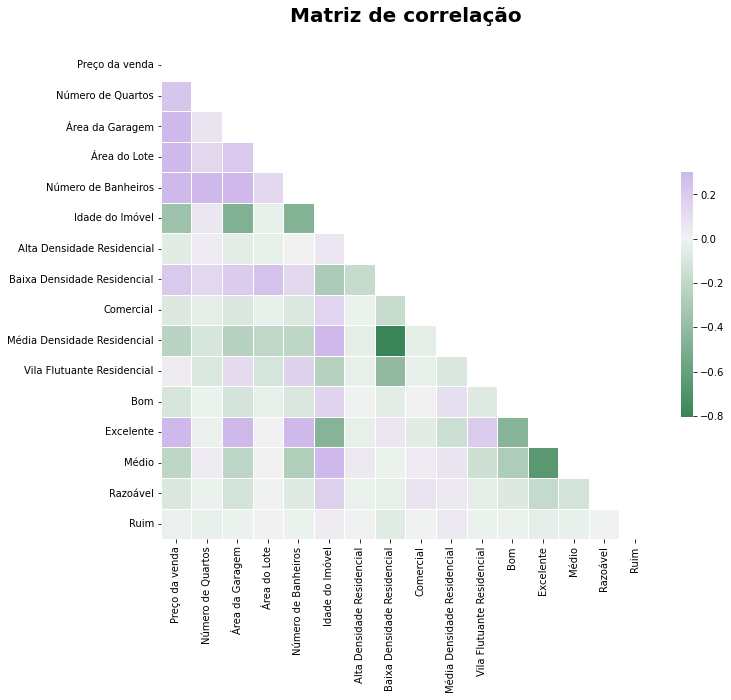

In [26]:
# Compute the correlation matrix
corr = base_dummy.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(500, 100000, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Matriz de correlação\n', fontdict = {'fontsize':20, 'fontweight':'bold'})
plt.show()

<ipython-input-27-fb7c52b5252b>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr_matrix, dtype=np.bool)


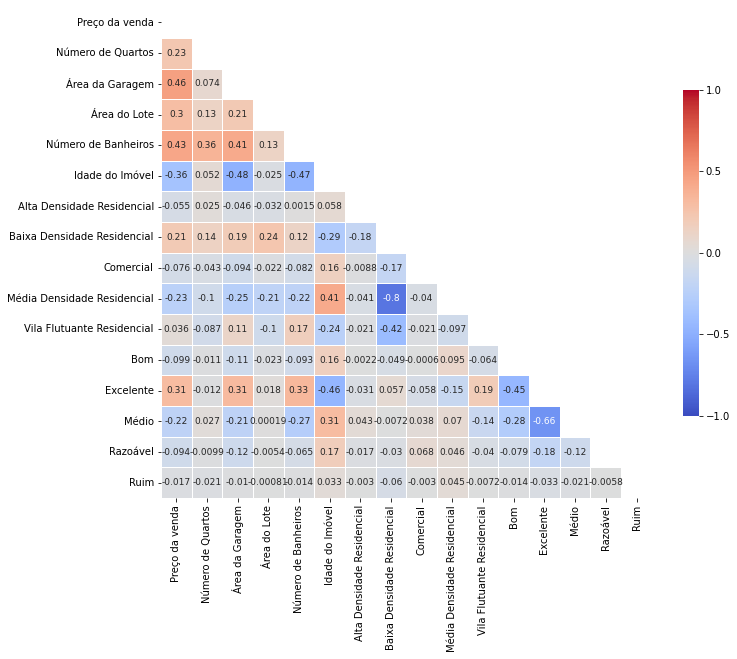

In [27]:
# Matriz de correlação com números
corr_matrix = base_dummy.corr()
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)]= True
f, ax = plt.subplots(figsize=(11, 15))

heatmap = sns.heatmap(corr_matrix,
                      mask = mask,
                      square = True,
                      linewidths = .5,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': .4,
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1,
                      vmax = 1,
                      annot = True,
                      annot_kws = {'size': 9})

#add the column names as labels
ax.set_yticklabels(corr_matrix.columns, rotation = 0)
ax.set_xticklabels(corr_matrix.columns)

sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

## medidas resumo (tendência central das variáveis escolhidas: média, moda, mediana)

In [28]:
base_dummy.describe()

,Preço da venda,Número de Quartos,Área da Garagem,Área do Lote,Número de Banheiros,Idade do Imóvel,Alta Densidade Residencial,Baixa Densidade Residencial,Comercial,Média Densidade Residencial,Vila Flutuante Residencial,Bom,Excelente,Médio,Razoável,Ruim
count,2919.000000,2919.000000,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,180052.854647,2.860226,472.874572,10168.114080,1.568003,36.479959,0.008907,0.775951,0.008565,0.157588,0.047619,0.162384,0.511477,0.293594,0.031518,0.001028
std,57381.565721,0.822693,215.394815,7886.996359,0.552969,30.336182,0.093973,0.417026,0.092164,0.364417,0.212995,0.368866,0.499954,0.455486,0.174742,0.032048
min,34900.000000,0.000000,0.000000,1300.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,154795.084126,2.000000,320.000000,7478.000000,1.000000,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,176734.841494,3.000000,480.000000,9453.000000,2.000000,35.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,191895.744157,3.000000,576.000000,11570.000000,2.000000,54.500000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
max,755000.000000,8.000000,1488.000000,215245.000000,4.000000,136.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [29]:
base_dummy.describe().to_excel('medidasresumo.xlsx')

## Distribuição das variáveis quantitativas

In [30]:
def curva_normal(df):
    mu, std = norm.fit(df) 
    # Plot
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)

    plt.plot(x, p, 'k', linewidth=2)

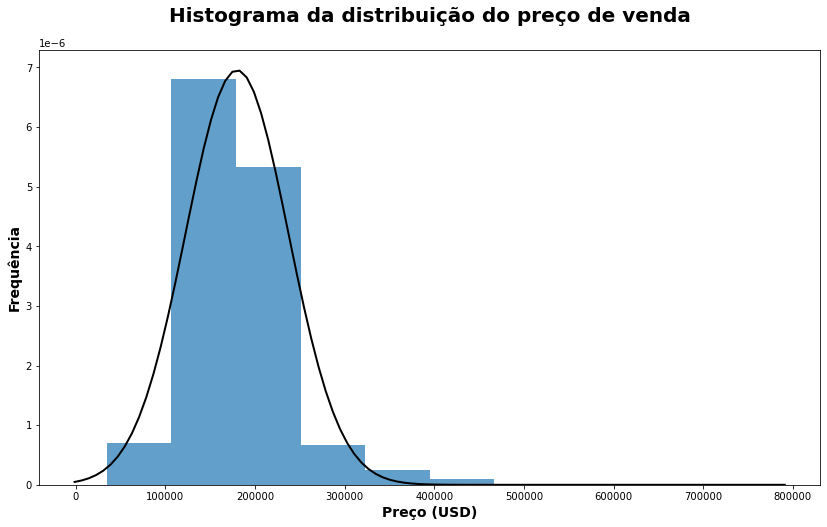

In [31]:
contagem, tam_coluna = np.histogram(base_dummy['Preço da venda'])

base_dummy[['Preço da venda']].plot(kind='hist', alpha=0.7, density=True, figsize=(14,8),legend=None)
plt.title('Histograma da distribuição do preço de venda\n', fontdict = {'fontsize':20, 'fontweight':'bold'})
plt.ylabel('Frequência',fontdict = {'fontsize':14,'fontweight':'bold'})
plt.xlabel('Preço (USD)',fontdict = {'fontsize':14,'fontweight':'bold'})
curva_normal(base_dummy[['Preço da venda']])

In [32]:
base_dummy[['Preço da venda']]

,Preço da venda
0,208500.000000
1,181500.000000
2,223500.000000
3,140000.000000
4,250000.000000
...,...
2914,167081.220949
2915,164788.778231
2916,219222.423400
2917,184924.279659


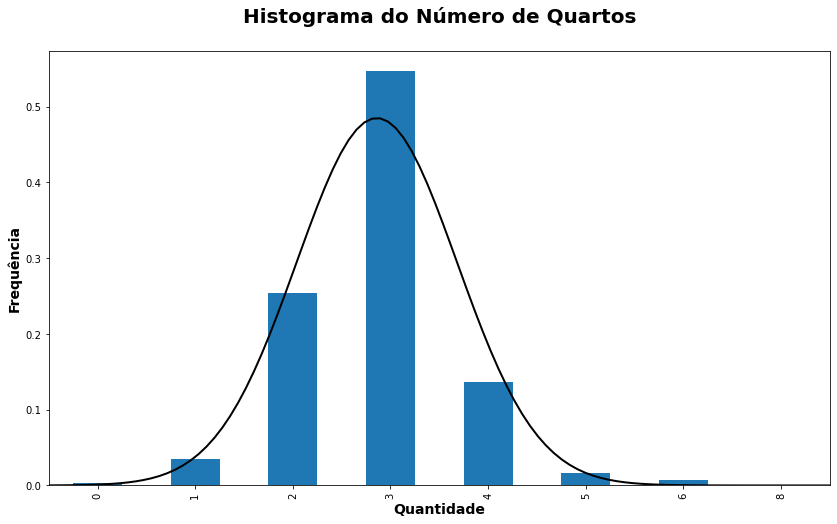

In [33]:
# contagem, tam_coluna = np.histogram(base_dummy['Número de Quartos'])

dado = base_dummy['Número de Quartos'].value_counts().to_frame().sort_index()
total = dado['Número de Quartos'].sum()

# base_dummy['Número de Quartos'].value_counts().to_frame().sort_index().plot(kind='bar', figsize=(14,8), legend=None)
(dado/total).plot(kind='bar', figsize=(14,8), legend=None)
plt.title('Histograma do Número de Quartos\n', fontdict = {'fontsize':20, 'fontweight':'bold'})
plt.ylabel('Frequência',fontdict = {'fontsize':14,'fontweight':'bold'})
plt.xlabel('Quantidade',fontdict = {'fontsize':14,'fontweight':'bold'})
curva_normal(base_dummy[['Número de Quartos']])

In [34]:
teste = np.isfinite(base_dummy[['Área da Garagem']])==False
base_dummy[teste['Área da Garagem']]

,Preço da venda,Zona,Qualidade do Aquecimento,Número de Quartos,Área da Garagem,Área do Lote,Número de Banheiros,Idade do Imóvel,Alta Densidade Residencial,Baixa Densidade Residencial,Comercial,Média Densidade Residencial,Vila Flutuante Residencial,Bom,Excelente,Médio,Razoável,Ruim
2576,176889.171525,Média Densidade Residencial,Excelente,3,NaN,9060,2,84,0,0,0,1,0,0,1,0,0,0


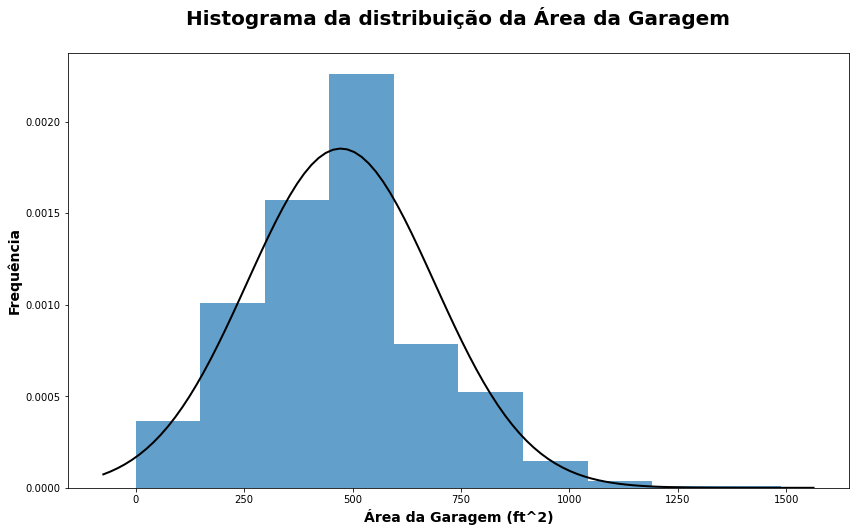

In [35]:
base_dummy[['Área da Garagem']] = base_dummy[['Área da Garagem']].apply(lambda x:x if x is not np.NAN else 1)

teste = base_dummy[['Área da Garagem']].drop([2576])

teste.plot(kind='hist', alpha=0.7, density=True, figsize=(14,8), legend=None)
plt.title('Histograma da distribuição da Área da Garagem\n', fontdict = {'fontsize':20, 'fontweight':'bold'})
plt.ylabel('Frequência',fontdict = {'fontsize':14,'fontweight':'bold'})
plt.xlabel('Área da Garagem (ft^2)',fontdict = {'fontsize':14,'fontweight':'bold'})

# mu, std = (np.std(base_dummy[['Área da Garagem']]),np.mean(base_dummy[['Área da Garagem']]))
# # Plot
# xmin, xmax = plt.xlim()
# x = np.linspace(xmin, xmax, 100)
# p = norm.pdf(x, mu, std)

# plt.plot(x, p, 'k', linewidth=2)



curva_normal(teste)

Text(0.5, 0, 'Área do Lote (ft^2)')

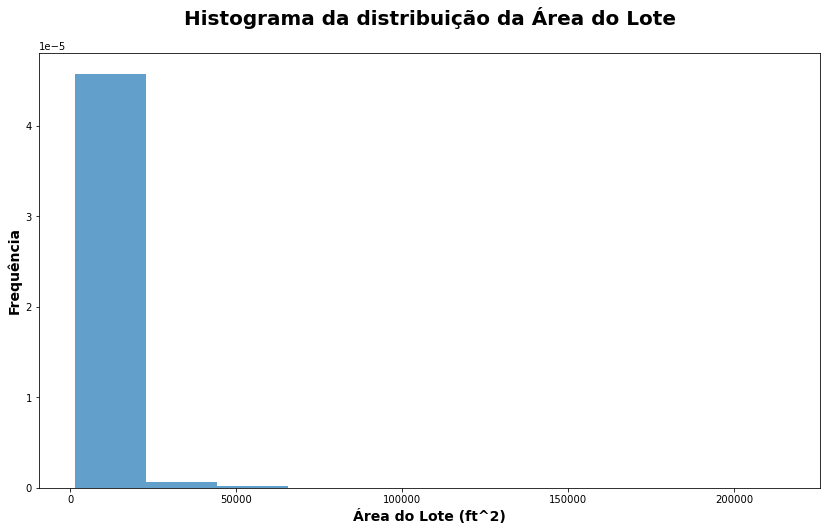

In [36]:
contagem, tam_coluna = np.histogram(base_dummy['Área do Lote'])

base_dummy[['Área do Lote']].plot(kind='hist', alpha=0.7, density=True, figsize=(14,8),legend=None)
plt.title('Histograma da distribuição da Área do Lote\n', fontdict = {'fontsize':20, 'fontweight':'bold'})
plt.ylabel('Frequência',fontdict = {'fontsize':14,'fontweight':'bold'})
plt.xlabel('Área do Lote (ft^2)',fontdict = {'fontsize':14,'fontweight':'bold'})

In [37]:
base_dummy[['Área do Lote']].describe()

,Área do Lote
count,2919.000000
mean,10168.114080
std,7886.996359
min,1300.000000
25%,7478.000000
50%,9453.000000
75%,11570.000000
max,215245.000000


Text(0.5, 0, 'Ordem de tamanho decrescente')

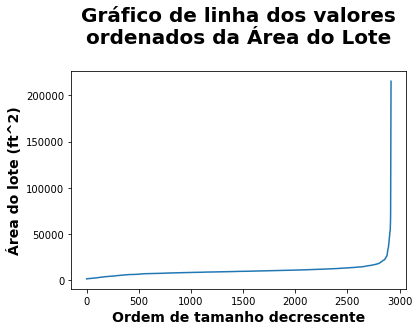

In [38]:
ordenadoAreaLote = base_dummy[['Área do Lote']].sort_values(['Área do Lote']).reset_index()
ordenadoAreaLote[['Área do Lote']].plot(kind='line',legend=None)
plt.title('Gráfico de linha dos valores\nordenados da Área do Lote\n', fontdict = {'fontsize':20, 'fontweight':'bold'})
plt.ylabel('Área do lote (ft^2)',fontdict = {'fontsize':14,'fontweight':'bold'})
plt.xlabel('Ordem de tamanho decrescente',fontdict = {'fontsize':14,'fontweight':'bold'})

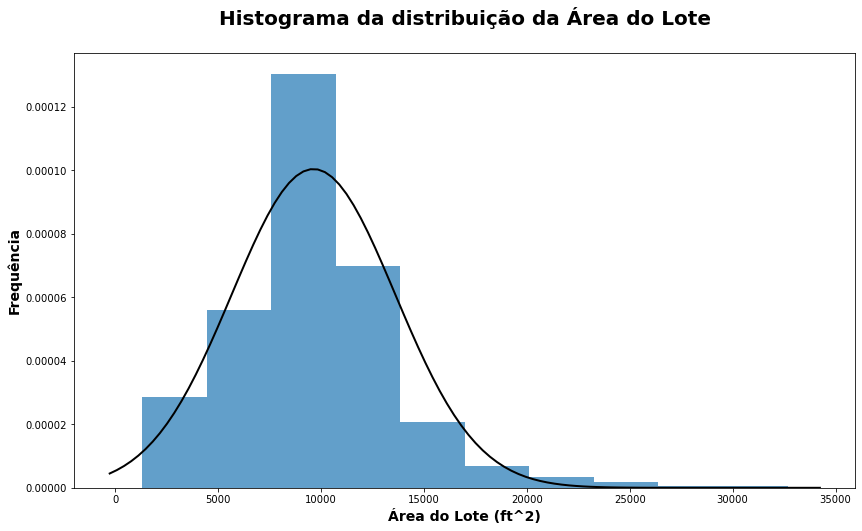

In [39]:
ordenadoAreaLoteFiltrado = ordenadoAreaLote[:-30]

ordenadoAreaLoteFiltrado[['Área do Lote']].plot(kind='hist', alpha=0.7, density=True, figsize=(14,8),legend=None)
plt.title('Histograma da distribuição da Área do Lote\n', fontdict = {'fontsize':20, 'fontweight':'bold'})
plt.ylabel('Frequência',fontdict = {'fontsize':14,'fontweight':'bold'})
plt.xlabel('Área do Lote (ft^2)',fontdict = {'fontsize':14,'fontweight':'bold'})

curva_normal(ordenadoAreaLoteFiltrado[['Área do Lote']])

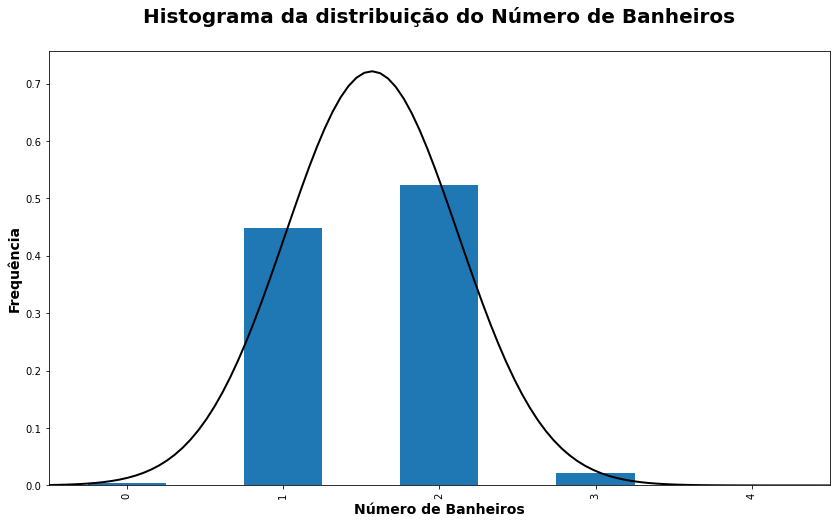

In [40]:
dado = base_dummy['Número de Banheiros'].value_counts().to_frame().sort_index()
total = dado['Número de Banheiros'].sum()

# base_dummy['Número de Quartos'].value_counts().to_frame().sort_index().plot(kind='bar', figsize=(14,8), legend=None)
(dado/total).plot(kind='bar', figsize=(14,8), legend=None)

# base_dummy['Número de Banheiros'].value_counts().to_frame().sort_index().plot(kind='bar', figsize=(14,8), legend=None)
plt.title('Histograma da distribuição do Número de Banheiros\n', fontdict = {'fontsize':20, 'fontweight':'bold'})
plt.ylabel('Frequência',fontdict = {'fontsize':14,'fontweight':'bold'})
plt.xlabel('Número de Banheiros',fontdict = {'fontsize':14,'fontweight':'bold'})

curva_normal(base_dummy['Número de Banheiros'])

Text(0.5, 1.0, 'Histograma da distribuição da Idade do Imóvel\n')

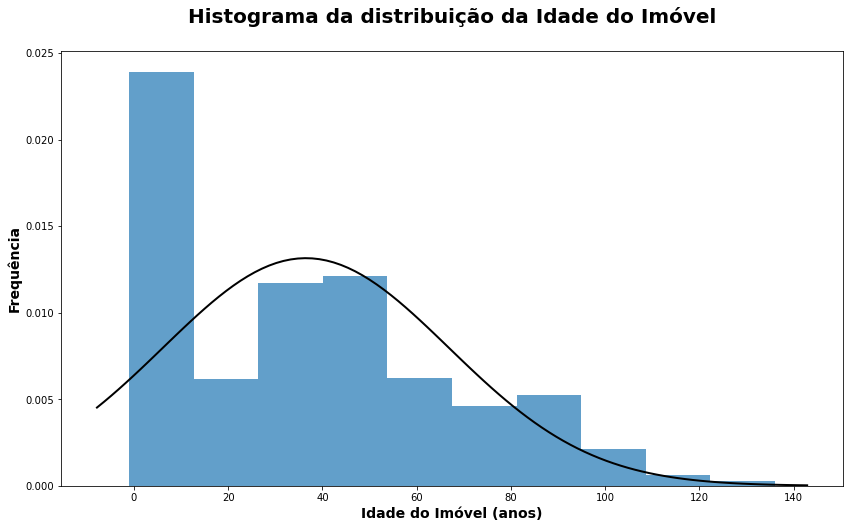

In [41]:
base_dummy[['Idade do Imóvel']].plot(kind='hist', alpha=0.7, density=True, figsize=(14,8),legend=None)

plt.ylabel('Frequência',fontdict = {'fontsize':14,'fontweight':'bold'})
plt.xlabel('Idade do Imóvel (anos)',fontdict = {'fontsize':14,'fontweight':'bold'})

mu, std = norm.fit(base_dummy[['Idade do Imóvel']]) 
# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
  
plt.plot(x, p, 'k', linewidth=2)
plt.title('Histograma da distribuição da Idade do Imóvel\n', fontdict = {'fontsize':20, 'fontweight':'bold'})

Text(0.5, 0, 'Idade do Imóvel (anos)')

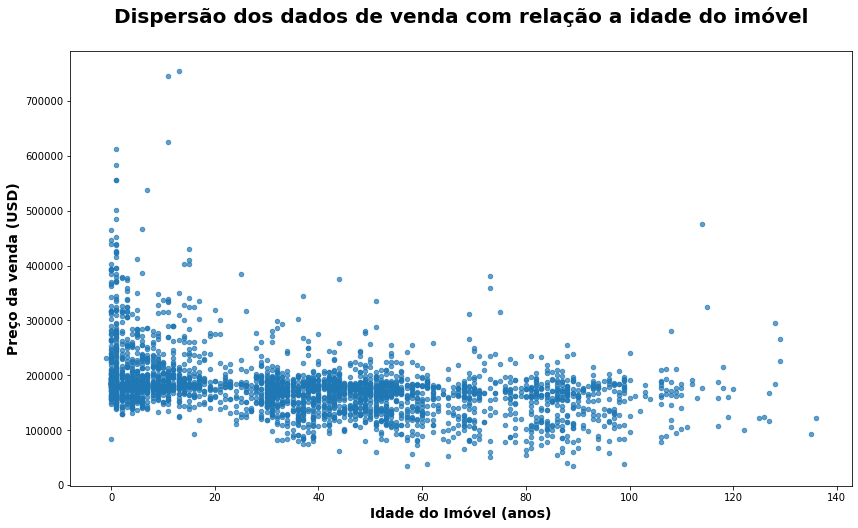

In [42]:
base_dummy.plot(kind='scatter', y='Preço da venda', x='Idade do Imóvel', alpha=0.7, figsize=(14,8))
plt.title('Dispersão dos dados de venda com relação a idade do imóvel\n', fontdict = {'fontsize':20, 'fontweight':'bold'})
plt.ylabel('Preço da venda (USD)',fontdict = {'fontsize':14,'fontweight':'bold'})
plt.xlabel('Idade do Imóvel (anos)',fontdict = {'fontsize':14,'fontweight':'bold'})

In [43]:
base_dummy.head()

,Preço da venda,Zona,Qualidade do Aquecimento,Número de Quartos,Área da Garagem,Área do Lote,Número de Banheiros,Idade do Imóvel,Alta Densidade Residencial,Baixa Densidade Residencial,Comercial,Média Densidade Residencial,Vila Flutuante Residencial,Bom,Excelente,Médio,Razoável,Ruim
0,208500.0,Baixa Densidade Residencial,Excelente,3,548.0,8450,2,5,0,1,0,0,0,0,1,0,0,0
1,181500.0,Baixa Densidade Residencial,Excelente,3,460.0,9600,2,31,0,1,0,0,0,0,1,0,0,0
2,223500.0,Baixa Densidade Residencial,Excelente,3,608.0,11250,2,7,0,1,0,0,0,0,1,0,0,0
3,140000.0,Baixa Densidade Residencial,Bom,3,642.0,9550,1,91,0,1,0,0,0,1,0,0,0,0
4,250000.0,Baixa Densidade Residencial,Excelente,4,836.0,14260,2,8,0,1,0,0,0,0,1,0,0,0


## Matriz covariancia

In [44]:
base_dummy_num = base_dummy.drop(['Zona','Qualidade do Aquecimento'], axis=1)
base_dummy_num_filtrada = base_dummy_num[base_dummy_num['Área da Garagem'].isnull()==False]
base_dummy_num_filtrada_sem_preco_lotarea = base_dummy_num_filtrada.drop(['Preço da venda','Área do Lote'], axis=1)

In [45]:
# matriz de covariancia
covariancia = np.cov(base_dummy_num_filtrada, rowvar=False)

In [46]:
pd.DataFrame(covariancia, columns=base_dummy_num_filtrada.columns, index=base_dummy_num_filtrada.columns)

,Preço da venda,Número de Quartos,Área da Garagem,Área do Lote,Número de Banheiros,Idade do Imóvel,Alta Densidade Residencial,Baixa Densidade Residencial,Comercial,Média Densidade Residencial,Vila Flutuante Residencial,Bom,Excelente,Médio,Razoável,Ruim
Preço da venda,3.293769e+09,10843.188530,5.745881e+06,1.342297e+08,13766.924283,-632445.512254,-295.911253,5030.241975,-401.069735,-4815.144880,437.273865,-2098.062287,8773.753812,-5701.688777,-942.230782,-31.771966
Número de Quartos,1.084319e+04,0.677049,1.309970e+01,8.620403e+02,0.162045,1.299341,0.001932,0.047205,-0.003258,-0.030107,-0.015278,-0.003334,-0.004932,0.010225,-0.001418,-0.000542
Área da Garagem,5.745881e+06,13.099700,4.639493e+04,3.623361e+05,48.656783,-3139.592491,-0.932033,17.413128,-1.872425,-19.629561,5.215096,-8.463677,33.823154,-20.897672,-4.392684,-0.069120
Área do Lote,1.342297e+08,862.040275,3.623361e+05,6.222562e+07,549.115091,-5999.684660,-23.727405,777.242191,-15.836252,-593.859674,-172.457882,-65.963345,72.979501,0.580318,-7.390275,-0.206199
Número de Banheiros,1.376692e+04,0.162045,4.865678e+01,5.491151e+02,0.305816,-7.905488,0.000081,0.028731,-0.004181,-0.043759,0.019564,-0.018911,0.092479,-0.067073,-0.006254,-0.000241
Idade do Imóvel,-6.324455e+05,1.299341,-3.139592e+03,-5.999685e+03,-7.905488,919.825043,0.166590,-3.660343,0.435862,4.551996,-1.553120,1.803983,-6.980391,4.225448,0.918527,0.032434
Alta Densidade Residencial,-2.959113e+02,0.001932,-9.320325e-01,-2.372740e+01,0.000081,0.166590,0.008834,-0.006919,-0.000076,-0.001402,-0.000425,-0.000077,-0.001472,0.001839,-0.000281,-0.000009
Baixa Densidade Residencial,5.030242e+03,0.047205,1.741313e+01,7.772422e+02,0.028731,-3.660343,-0.006919,0.173764,-0.006653,-0.122140,-0.036988,-0.007517,0.011959,-0.001446,-0.002198,-0.000798
Comercial,-4.010697e+02,-0.003258,-1.872425e+00,-1.583625e+01,-0.004181,0.435862,-0.000076,-0.006653,0.008497,-0.001348,-0.000408,-0.000021,-0.002668,0.001597,0.001101,-0.000009
Média Densidade Residencial,-4.815145e+03,-0.030107,-1.962956e+01,-5.938597e+02,-0.043759,4.551996,-0.001402,-0.122140,-0.001348,0.132602,-0.007496,0.012835,-0.028005,0.011722,0.002924,0.000524


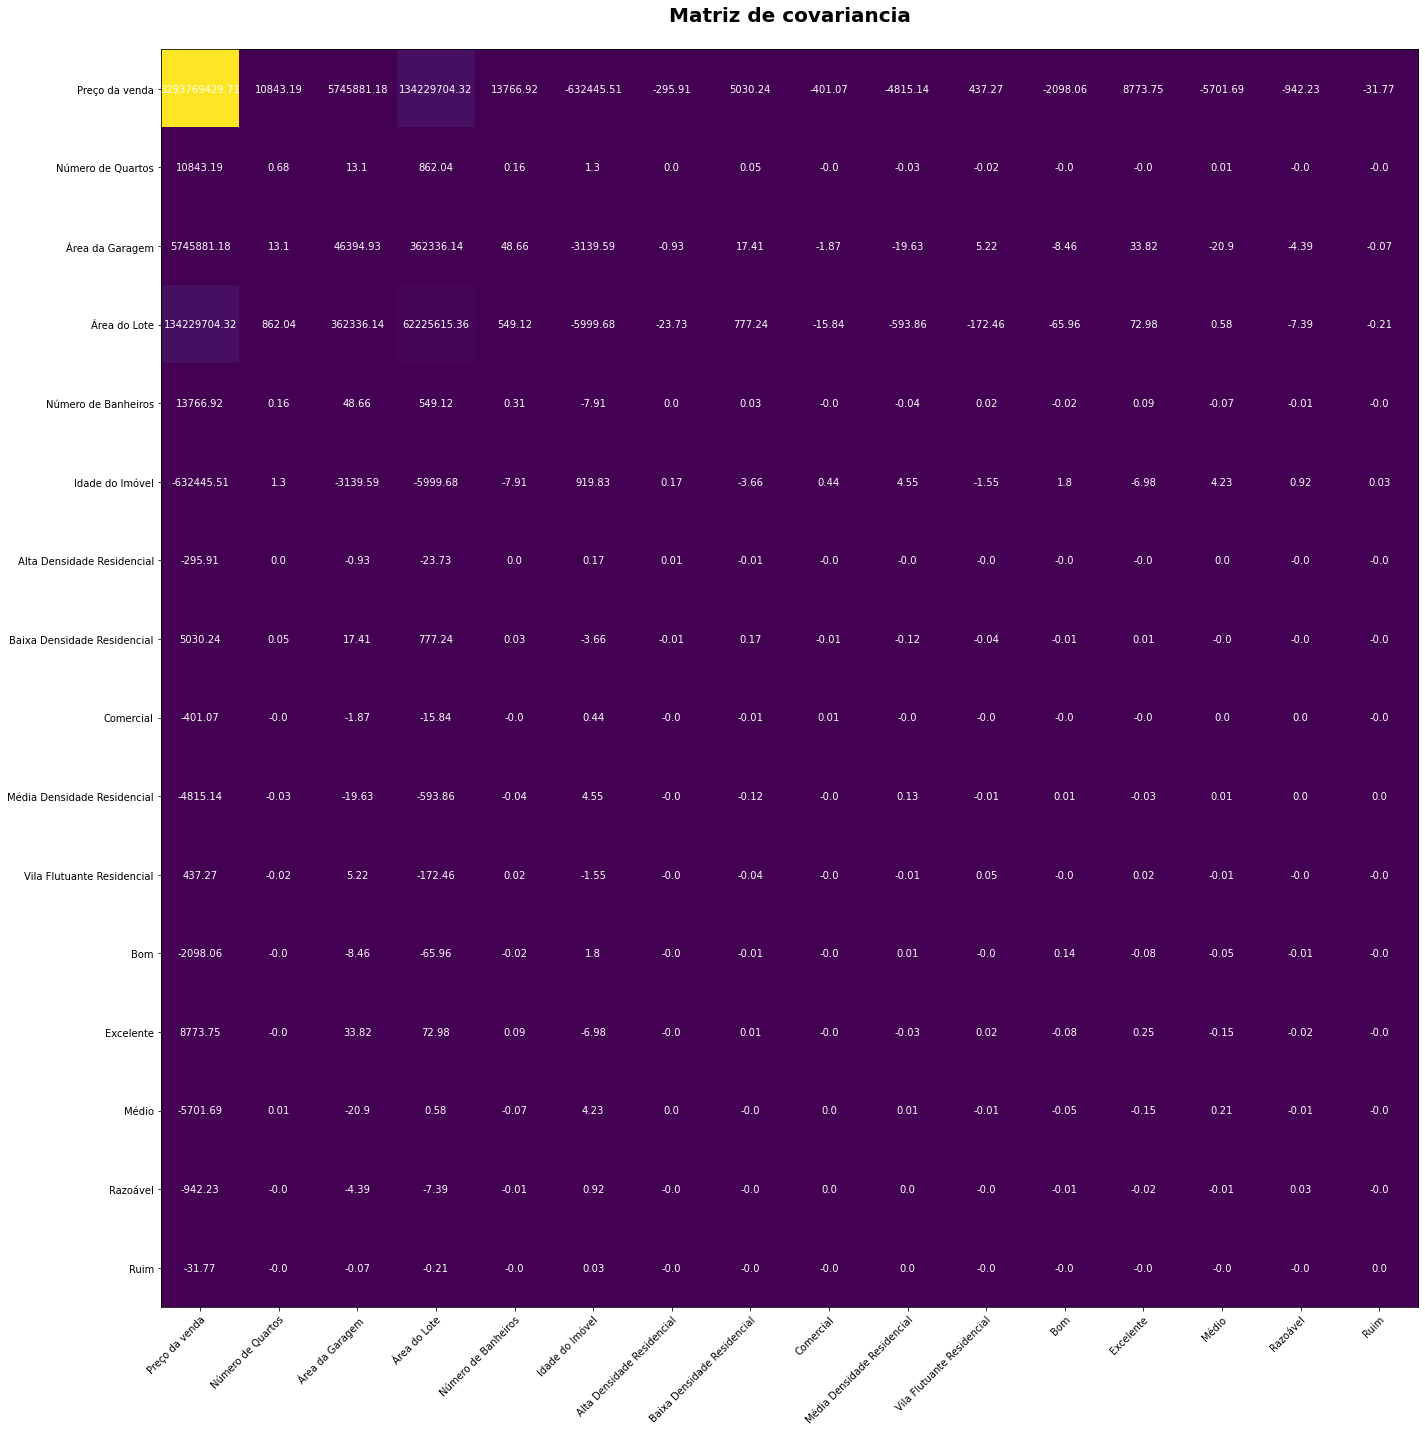

In [47]:

vegetables = base_dummy_num_filtrada.columns
farmers = base_dummy_num_filtrada.columns

harvest = np.array([[float("{:0.2f}".format(x)) for x in lista] for lista in covariancia])


fig, ax = plt.subplots(figsize=(20, 20))
im = ax.imshow(harvest)

# We want to show all ticks...
ax.set_xticks(np.arange(len(farmers)))
ax.set_yticks(np.arange(len(vegetables)))
# ... and label them with the respective list entries
ax.set_xticklabels(farmers)
ax.set_yticklabels(vegetables)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(vegetables)):
    for j in range(len(farmers)):
        text = ax.text(j, i, harvest[i, j],
                       ha="center", va="center", color="w")

ax.set_title("Matriz de covariancia\n", fontdict = {'fontsize':20, 'fontweight':'bold'})
fig.tight_layout()
plt.show()

## Comparação dos preços com as variáveis categóricas (TBD)

In [48]:
base_dummy.head()

,Preço da venda,Zona,Qualidade do Aquecimento,Número de Quartos,Área da Garagem,Área do Lote,Número de Banheiros,Idade do Imóvel,Alta Densidade Residencial,Baixa Densidade Residencial,Comercial,Média Densidade Residencial,Vila Flutuante Residencial,Bom,Excelente,Médio,Razoável,Ruim
0,208500.0,Baixa Densidade Residencial,Excelente,3,548.0,8450,2,5,0,1,0,0,0,0,1,0,0,0
1,181500.0,Baixa Densidade Residencial,Excelente,3,460.0,9600,2,31,0,1,0,0,0,0,1,0,0,0
2,223500.0,Baixa Densidade Residencial,Excelente,3,608.0,11250,2,7,0,1,0,0,0,0,1,0,0,0
3,140000.0,Baixa Densidade Residencial,Bom,3,642.0,9550,1,91,0,1,0,0,0,1,0,0,0,0
4,250000.0,Baixa Densidade Residencial,Excelente,4,836.0,14260,2,8,0,1,0,0,0,0,1,0,0,0


## Coefienciente de variação

In [49]:
cv = lambda x: np.std(x, ddof=1) / np.mean(x) * 100 

In [50]:
base.head()

,Preço da venda,Zona,Qualidade do Aquecimento,Número de Quartos,Área da Garagem,Área do Lote,Número de Banheiros,Idade do Imóvel
0,208500.0,Baixa Densidade Residencial,Excelente,3,548.0,8450,2,5
1,181500.0,Baixa Densidade Residencial,Excelente,3,460.0,9600,2,31
2,223500.0,Baixa Densidade Residencial,Excelente,3,608.0,11250,2,7
3,140000.0,Baixa Densidade Residencial,Bom,3,642.0,9550,1,91
4,250000.0,Baixa Densidade Residencial,Excelente,4,836.0,14260,2,8


In [51]:
base_quantitativa = base.drop(['Zona','Qualidade do Aquecimento'],axis=1)

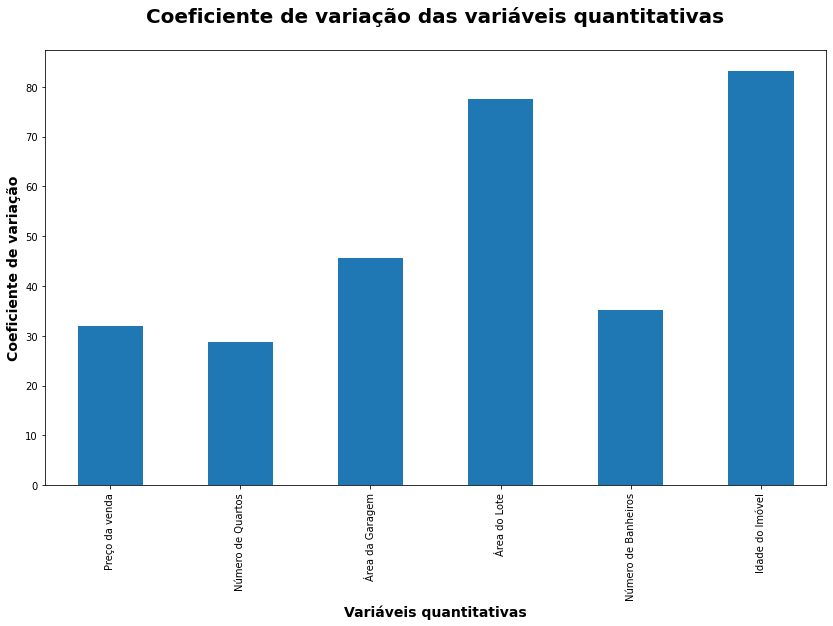

In [52]:
base_quantitativa.apply(cv).to_frame().plot(kind='bar', legend=None, figsize=(14,8))
plt.title('Coeficiente de variação das variáveis quantitativas\n', fontdict = {'fontsize':20, 'fontweight':'bold'})
plt.ylabel('Coeficiente de variação', fontdict = {'fontsize':14,'fontweight':'bold'})
plt.xlabel('Variáveis quantitativas',  fontdict = {'fontsize':14,'fontweight':'bold'})
# plt.xticks(rotation=45, horizontalalignment='right')
plt.show()

In [53]:
base_quantitativa.describe()

,Preço da venda,Número de Quartos,Área da Garagem,Área do Lote,Número de Banheiros,Idade do Imóvel
count,2919.000000,2919.000000,2918.000000,2919.000000,2919.000000,2919.000000
mean,180052.854647,2.860226,472.874572,10168.114080,1.568003,36.479959
std,57381.565721,0.822693,215.394815,7886.996359,0.552969,30.336182
min,34900.000000,0.000000,0.000000,1300.000000,0.000000,-1.000000
25%,154795.084126,2.000000,320.000000,7478.000000,1.000000,7.000000
50%,176734.841494,3.000000,480.000000,9453.000000,2.000000,35.000000
75%,191895.744157,3.000000,576.000000,11570.000000,2.000000,54.500000
max,755000.000000,8.000000,1488.000000,215245.000000,4.000000,136.000000


In [55]:
base_sem_NAN = base_quantitativa.drop([2576])

In [56]:
for coluna in base_sem_NAN.columns:
    print(coluna + " : " + str(statistics.mode(base_sem_NAN[coluna])))

Preço da venda : 140000.0
Número de Quartos : 3
Área da Garagem : 0.0
Área do Lote : 9600
Número de Banheiros : 2
Idade do Imóvel : 1


In [58]:
base_dummy.to_csv('base_dummy.csv', index=False)

In [59]:
base_dummy.head()

,Preço da venda,Zona,Qualidade do Aquecimento,Número de Quartos,Área da Garagem,Área do Lote,Número de Banheiros,Idade do Imóvel,Alta Densidade Residencial,Baixa Densidade Residencial,Comercial,Média Densidade Residencial,Vila Flutuante Residencial,Bom,Excelente,Médio,Razoável,Ruim
0,208500.0,Baixa Densidade Residencial,Excelente,3,548.0,8450,2,5,0,1,0,0,0,0,1,0,0,0
1,181500.0,Baixa Densidade Residencial,Excelente,3,460.0,9600,2,31,0,1,0,0,0,0,1,0,0,0
2,223500.0,Baixa Densidade Residencial,Excelente,3,608.0,11250,2,7,0,1,0,0,0,0,1,0,0,0
3,140000.0,Baixa Densidade Residencial,Bom,3,642.0,9550,1,91,0,1,0,0,0,1,0,0,0,0
4,250000.0,Baixa Densidade Residencial,Excelente,4,836.0,14260,2,8,0,1,0,0,0,0,1,0,0,0
